### Plan

1. Data cleanup
 - Formatting issues
 - Duplicates
 - Missing values
 
2. Exploration

 - visualizations

3. Modeling
    - 

4. Evalution
    -

### Import Packages

In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import time
%matplotlib inline

### 1. Data Cleanup for Null Values

File name: imdb.title.ratings.csv
- No nun values

File Name: tmdb.movies.csv
- No nun values

File Name: tn.movie_budgets.csv
- No nun values

Data with nun values:

File name: bom.movie_gross.csv
- leaving null value in data set

File Name: imdb.title.akas.csv
- leaving null value in data set

File Name: imdb.title.basics.csv
- leaving null vale in data set

### Import data sets
- df_ratings #dropped for merge
- df_budgets
- df_popularity
- df_gross
- df_akas #dropped for merge
- df_basics

In [2]:
# Sharon files
# df_ratings = pd.read_csv("imdb.title.ratings.csv") dropped for merge
df_budgets = pd.read_csv("files/tn.movie_budgets.csv")
df_popularity = pd.read_csv("files/tmdb.movies.csv")

In [3]:
# Daniel files: bom.movie_gross.csv"
df_gross = pd.read_csv("files/bom.movie_gross.csv")
# df_akas = pd.read_csv("imdb.title.akas.csv") dropped for merge
df_basics = pd.read_csv("files/imdb.title.basics.csv")

### Functions for Formatting

In [4]:
# turn object to integer:

def turn_to_int(data, column):
    data[column] = data[column].apply(lambda x: x.replace("$", ""))
    data[column] = data[column].apply(lambda x: x.replace(",", ""))
    data[column] = data[column].astype(int)

In [5]:
# turn interger into object:
def turn_to_obj(data, column):
    data[column] = data[column].astype(str)

In [6]:
# turn id(int) to id(obj):
turn_to_obj(df_budgets, "id")

In [7]:
# turn from obj to int: budget files, to columns "production_budget", "domestic_gross", "worldwide_gross"
turn_to_int(df_budgets, "production_budget")
turn_to_int(df_budgets, "domestic_gross")
turn_to_int(df_budgets, "worldwide_gross")

In [8]:
# from df_basics, turn start_year(int) to str
turn_to_obj(df_basics, "start_year")

In [9]:
# Daniel Files: turn year (int) to year(str)
turn_to_obj(df_gross, "year")

### Drop Columns
#from df_movies_final, dropping "id_x", "id_y", "release_date_y", "start_year", "original_title", "year"
#we are not taking domestic_gross, foreign_gross from df_gross file
#from df_aka file, we are not taking ordering, types, attributes, is_original_title
#from df_basics, we are not taking tconst

In [10]:
def drop_columns(data, column):
    data.drop(column, inplace=True, axis=1)# axis=0 to row, axis=1 to column

In [10]:
# from ratings, dropping "numvotes"
# drop_columns(df_ratings, "numvotes")
# df_ratings.head()

In [11]:
# from df_popularity, dropping "unnamed" and "genre_ids", "original_title"
drop_columns(df_popularity, ["id", "Unnamed: 0", "genre_ids", "original_title"])

In [37]:
df_popularity.head()

,original_language,popularity,release_date,title,vote_average,vote_count
0,en,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,en,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,en,28.515,2010-05-07,Iron Man 2,6.8,12368
3,en,28.005,1995-11-22,Toy Story,7.9,10174
4,en,27.920,2010-07-16,Inception,8.3,22186


In [12]:
# from df_budgets, dropping "id" and "release_date"
drop_columns(df_budgets, ["id", "release_date"])
df_budgets.head()

,movie,production_budget,domestic_gross,worldwide_gross
0,Avatar,425000000,760507625,2776345279
1,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,Dark Phoenix,350000000,42762350,149762350
3,Avengers: Age of Ultron,330600000,459005868,1403013963
4,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [13]:
# from df_gross, dropping "foreign_gross" and "domestic_gross"
drop_columns(df_gross, ["domestic_gross", "foreign_gross", "year"])

In [40]:
df_gross.head()

,title,studio
0,Toy Story 3,BV
1,Alice in Wonderland (2010),BV
2,Harry Potter and the Deathly Hallows Part 1,WB
3,Inception,WB
4,Shrek Forever After,P/DW


In [41]:
# from df_akas, dropping "ordering", "types", "attributes", "is_original_title"
# drop_columns(df_akas, ["ordering", "types", "attributes", "is_original_title"])
# df_akas.head()

In [14]:
# from df_basics, dropping "tconst", "start_year"
drop_columns(df_basics, ["tconst", "original_title"])

In [43]:
df_basics.head()

,primary_title,start_year,runtime_minutes,genres
0,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,One Day Before the Rainy Season,2019,114.0,"Biography,Drama"
2,The Other Side of the Wind,2018,122.0,Drama
3,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy"


### Merge datasets

In [44]:
print(df_gross.shape)
print(df_popularity.shape)

(3387, 2)
(26517, 6)


In [15]:
df_movies = pd.merge(df_popularity, df_gross, how="left", on="title")
df_movies.head(10)

,original_language,popularity,release_date,title,vote_average,vote_count,studio
0,en,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,NaN
1,en,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,P/DW
2,en,28.515,2010-05-07,Iron Man 2,6.8,12368,Par.
3,en,28.005,1995-11-22,Toy Story,7.9,10174,NaN
4,en,27.920,2010-07-16,Inception,8.3,22186,WB
5,en,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229,NaN
6,en,26.526,2009-12-18,Avatar,7.4,18676,NaN
7,en,24.445,2010-06-17,Toy Story 3,7.7,8340,BV
8,en,23.673,2010-07-09,Despicable Me,7.2,10057,Uni.
9,en,22.855,2010-11-04,Megamind,6.8,3635,P/DW


In [16]:
df_budgets.rename(columns = {"movie": "title"}, inplace=True)
df_budgets.head()

,title,production_budget,domestic_gross,worldwide_gross
0,Avatar,425000000,760507625,2776345279
1,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,Dark Phoenix,350000000,42762350,149762350
3,Avengers: Age of Ultron,330600000,459005868,1403013963
4,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [47]:
print(df_movies.shape)
print(df_budgets.shape)

(26517, 7)
(5782, 4)


In [17]:
df_movies2 = pd.merge(df_movies, df_budgets, how = "left", on="title")
df_movies2.head()

,original_language,popularity,release_date,title,vote_average,vote_count,studio,production_budget,domestic_gross,worldwide_gross
0,en,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,NaN,NaN,NaN,NaN
1,en,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,P/DW,165000000.0,217581232.0,494870992.0
2,en,28.515,2010-05-07,Iron Man 2,6.8,12368,Par.,170000000.0,312433331.0,621156389.0
3,en,28.005,1995-11-22,Toy Story,7.9,10174,NaN,30000000.0,191796233.0,364545516.0
4,en,27.920,2010-07-16,Inception,8.3,22186,WB,160000000.0,292576195.0,835524642.0


In [18]:
df_basics.rename(columns = {"primary_title": "title"}, inplace=True)
df_basics.head()

,title,start_year,runtime_minutes,genres
0,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,One Day Before the Rainy Season,2019,114.0,"Biography,Drama"
2,The Other Side of the Wind,2018,122.0,Drama
3,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy"


In [50]:
print(df_movies2.shape)
print(df_basics.shape)

(26606, 10)
(146144, 4)


In [19]:
df_movies_final = pd.merge(df_basics, df_movies2, how = "left", on="title")
df_movies_final.head()

,title,start_year,runtime_minutes,genres,original_language,popularity,release_date,vote_average,vote_count,studio,production_budget,domestic_gross,worldwide_gross
0,Sunghursh,2013,175.0,"Action,Crime,Drama",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,The Other Side of the Wind,2018,122.0,Drama,en,9.8,2018-11-02,7.0,64.0,NaN,NaN,NaN,NaN
3,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
#replace null values in release_date with start_year from df_basics
df_movies_final.release_date.fillna(df_movies_final.start_year, inplace=True)

In [21]:
#"start_year" no longer needed
drop_columns(df_movies_final, "start_year")

In [22]:
df_movies_final["foreign_gross"] = (df_movies_final.worldwide_gross - df_movies_final.domestic_gross)
df_movies_final["net_profit"] = (df_movies_final.worldwide_gross - df_movies_final.production_budget)
drop_columns(df_movies_final, ["runtime_minutes", "original_language", "studio"])
#"original_language", "studio", "runtime_minutes", no longer needed

In [23]:
df_movies_final.head()

,title,genres,popularity,release_date,vote_average,vote_count,production_budget,domestic_gross,worldwide_gross,foreign_gross,net_profit
0,Sunghursh,"Action,Crime,Drama",NaN,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,One Day Before the Rainy Season,"Biography,Drama",NaN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,The Other Side of the Wind,Drama,9.8,2018-11-02,7.0,64.0,NaN,NaN,NaN,NaN,NaN
3,Sabse Bada Sukh,"Comedy,Drama",NaN,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,The Wandering Soap Opera,"Comedy,Drama,Fantasy",NaN,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
df_movies_final.describe()

,popularity,vote_average,vote_count,production_budget,domestic_gross,worldwide_gross,foreign_gross,net_profit
count,24204.000000,24204.000000,24204.000000,4.550000e+03,4.550000e+03,4.550000e+03,4.550000e+03,4.550000e+03
mean,3.853930,5.811552,282.449802,3.450462e+07,4.382987e+07,1.047967e+08,6.096687e+07,7.029212e+07
std,4.916361,1.710107,1129.202956,4.785826e+07,7.714793e+07,1.986001e+08,1.271451e+08,1.633475e+08
min,0.600000,0.000000,1.000000,9.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00,-1.104502e+08
25%,0.655000,5.000000,2.000000,4.357373e+06,6.510800e+04,1.884251e+06,1.030822e+05,-2.609697e+06
50%,1.767000,6.000000,8.000000,1.500000e+07,1.227786e+07,3.435676e+07,1.415973e+07,1.251745e+07
75%,5.754000,6.900000,56.000000,4.000000e+07,4.729874e+07,9.632292e+07,5.127620e+07,6.020913e+07
max,80.773000,10.000000,22186.000000,4.250000e+08,7.605076e+08,2.776345e+09,2.015838e+09,2.351345e+09


In [44]:
df_movies_final.describe().index

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

In [24]:
#called index 75% (Q3) and index 25% (Q1) to calculate IQR
df_movies_final["popularity"].describe().iloc[6] - df_movies_final["popularity"].describe().iloc[4]

5.098999999999999

### Functions for Exploration

1. Drop Outliers

In [26]:
#calculate IQR to find outliers
def calculate_interquartile_range(data, column):
    return data[column].describe().iloc[6] - data[column].describe().iloc[4]

In [27]:
calculate_interquartile_range(df_movies_final, ["popularity", "vote_average", "vote_count"])

popularity       5.099
vote_average     1.900
vote_count      54.000
dtype: float64

In [45]:
#drop lower and upper outliers from each column
def drop_outliers(data, column):
    lower_outlier = data[column].describe().loc["25%"] - (1.5 * calculate_interquartile_range(data, column))
    upper_outlier = data[column].describe().loc["75%"] + (1.5 * calculate_interquartile_range(data, column))
    return data[(data[column] > lower_outlier) & (data[column] < upper_outlier)]

2. Calculate Mean

In [161]:
#calculate mean of each column without outliers
#iterating through each genre
def calculate_mean(data, column, genres):
    list_obj = []
    df_without_outlier = drop_outliers(data, column)
    for genre in genres:
        mean = round(df_without_outlier[df_without_outlier["genres"].str.contains(genre)==True].mean(),2)
        list_obj.append(mean[column])
    return list_obj

In [62]:
calculate_mean(df_movies_final, "production_budget", "Action")

popularity           9.801540e+00
vote_average         5.855789e+00
vote_count           1.289218e+03
production_budget    3.049076e+07
domestic_gross       3.343737e+07
worldwide_gross      7.632116e+07
foreign_gross        4.288379e+07
net_profit           4.583040e+07
dtype: float64

In [124]:
genre = ["Action", "Adventure", "Animation", "Comedy", "Crime", "Drama", "Fantasy", "Horror", "Mystery", "Romance", "Sci-Fi", "Thriller"]

In [133]:
#popularity mean
calculate_mean(df_movies_final, "popularity", genre)

4.066878224101507
4.034992868462763
4.485887733887732
3.5494475005457717
4.093360106383007
3.480557782231007
4.011331944444435
3.183791819464077
3.6695874906924755
3.7597113840340417
3.425333011582999
3.401369230769286


In [131]:
#vote_average mean
calculate_mean(df_movies_final, "vote_average", genre)

5.602866972477057
5.885263157894749
6.310681399631688
5.76220904699164
5.80290005178664
5.998622295527338
5.714713216957599
5.04919113241462
5.5411677753141255
5.978929765886299
5.382516188714157
5.426020015396429


In [132]:
#vote_count mean
calculate_mean(df_movies_final, "vote_count", genre)

22.327979274611398
21.564102564102566
21.037735849056602
17.992193808882906
23.28205128205128
18.761877306273064
19.959363957597173
16.943506493506494
20.649138712601996
18.980861244019138
18.40340909090909
18.75639141933588


In [134]:
#production_budget mean
calculate_mean(df_movies_final, "production_budget", genre)

30490758.549122807
33374656.565656565
32450406.50406504
23592710.773913044
24090947.74364896
17567022.620921306
25540303.03030303
16040791.230290456
19113314.04263566
16027569.739952719
21588209.307692308
19629035.676557865


In [135]:
#domestic_gross mean
calculate_mean(df_movies_final, "domestic_gross", genre)

30257700.617322836
35951837.18384401
31866148.404958677
28117856.9781491
22645401.33647059
18480256.886429258
27337646.3313253
19509311.757446807
25083932.186507937
20741916.302663438
25429821.15591398
21211675.40560472


In [136]:
#worldwide_gross mean
calculate_mean(df_movies_final, "worldwide_gross", genre)

59915757.2151463
66572089.43464052
54508980.93333333
50223595.401574805
45989445.241784036
36118281.63334958
54308639.17218543
38720048.08405172
48048289.10288066
42193888.107317075
38903494.93939394
41191026.893455096


In [137]:
#foreign_gross mean
calculate_mean(df_movies_final, "foreign_gross", genre)

28685133.364285715
31930899.379310343
31416866.923809525
22454438.29281046
21635241.5754717
17949382.214460187
23872271.887323942
19083093.0
25196872.98765432
21677277.858536586
17869122.666666668
19765497.6244204


In [154]:
#net_profit mean
calculate_mean(df_movies_final, "net_profit", genre)

[25277569.809682805,
 30184412.423312884,
 34694398.45454545,
 26407329.019788917,
 19788747.722748816,
 16501189.402157921,
 18617069.874172185,
 21492106.880694143,
 27508919.520833332,
 23195732.360696517,
 18980943.190751445,
 19417062.584355827]

In [157]:
df = pd.DataFrame(columns=['production_budget', 'domestic_gross', 'foreign_gross'])
df['genres'] = genre
df.set_index('genres', inplace=True)
df.head()

,production_budget,domestic_gross,foreign_gross
genres,,,
Action,NaN,NaN,NaN
Adventure,NaN,NaN,NaN
Animation,NaN,NaN,NaN
Comedy,NaN,NaN,NaN
Crime,NaN,NaN,NaN


In [194]:
df["production_budget"] = calculate_mean(df_movies_final, "production_budget", genre)
df["domestic_gross"] = calculate_mean(df_movies_final, "domestic_gross", genre)
df["foreign_gross"] = calculate_mean(df_movies_final, "foreign_gross", genre)
df["worldwide_gross"] = calculate_mean(df_movies_final, "worldwide_gross", genre)
df["net_profit"] = calculate_mean(df_movies_final, "net_profit", genre)
df["popularity"] = calculate_mean(df_movies_final, "popularity", genre)
df["vote_average"] = calculate_mean(df_movies_final, "vote_average", genre)
df["vote_count"] = calculate_mean(df_movies_final, "vote_count", genre)
df

,conservative,compromised,aggressive,production_budget,domestic_gross,foreign_gross,worldwide_gross,net_profit,popularity,vote_average,vote_count
genres,,,,,,,,,,,
Action,NaN,NaN,NaN,30490758.55,30257700.62,28685133.36,59915757.22,25277569.81,4.07,5.60,22.33
Adventure,NaN,NaN,NaN,33374656.57,35951837.18,31930899.38,66572089.43,30184412.42,4.03,5.89,21.56
Animation,NaN,NaN,NaN,32450406.50,31866148.40,31416866.92,54508980.93,34694398.45,4.49,6.31,21.04
Comedy,NaN,NaN,NaN,23592710.77,28117856.98,22454438.29,50223595.40,26407329.02,3.55,5.76,17.99
Crime,NaN,NaN,NaN,24090947.74,22645401.34,21635241.58,45989445.24,19788747.72,4.09,5.80,23.28
Drama,NaN,NaN,NaN,17567022.62,18480256.89,17949382.21,36118281.63,16501189.40,3.48,6.00,18.76
Fantasy,NaN,NaN,NaN,25540303.03,27337646.33,23872271.89,54308639.17,18617069.87,4.01,5.71,19.96
Horror,NaN,NaN,NaN,16040791.23,19509311.76,19083093.00,38720048.08,21492106.88,3.18,5.05,16.94
Mystery,NaN,NaN,NaN,19113314.04,25083932.19,25196872.99,48048289.10,27508919.52,3.67,5.54,20.65


In [171]:
df.dtypes

production_budget    float64
domestic_gross       float64
foreign_gross        float64
worldwide_gross      float64
net_profit           float64
popularity           float64
vote_average         float64
vote_count           float64
dtype: object

In [164]:
df.loc["Action", "production_budget"]

30490758.55

In [172]:
(0.4 * df.loc["Action", "production_budget"]) + (0.6 * df.loc["Action", "domestic_gross"])

30350923.792000003

In [183]:
#Conservative ranking: weighted ranking using "production_budget" and "domestic_gross" for all genres
def conservative_ranking(genre, col1, col2):
    weighted_output = []
    for film in genre:
        weighted_sum = (0.4 * df.loc[film, col1]) + (0.6 * df.loc[film, col2])
        weighted_output.append(weighted_sum)
    return weighted_output

In [179]:
df.index

Index(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Drama',
       'Fantasy', 'Horror', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller'],
      dtype='object', name='genres')

In [195]:
conservative_ranking(df.index, "production_budget", "domestic_gross")

[30350923.792000003,
 34920964.936,
 32099851.64,
 26307798.496,
 23223619.9,
 18114963.182,
 26618709.009999998,
 18121903.548,
 22695684.93,
 18856177.676,
 23893176.419999998,
 20578619.518]

In [185]:
#Compromised ranking: weighted ranking using "production_budget", "domestic_gross", "foreign_gross" for all genres
def compromised_ranking(genre, col1, col2, col3):
    weighted_output = []
    for film in genre:
        weighted_sum = (0.2 * df.loc[film, col1]) + (0.4 * df.loc[film, col2]) + (0.4 * df.loc[film, col3])
        weighted_output.append(weighted_sum)
    return weighted_output

In [186]:
compromised_ranking(df.index, "production_budget", "domestic_gross", "foreign_gross")

[29675285.302000005,
 33828025.938,
 31803287.428000003,
 24947460.262000002,
 22530446.716,
 18085260.164,
 25592027.894,
 18645120.150000002,
 23934984.880000003,
 20173191.612,
 21637219.394,
 20316676.348]

In [187]:
#Aggresive Ranking: weighted ranking using "production_budget", "domestic_gross", "foreign_gross" ....for all genres
def aggresive_ranking(genre, col1, col2, col3):
    weighted_output = []
    for film in genre:
        weighted_sum = (0.3 * df.loc[film, col1] + (0.4 * df.loc[film, col2] + (0.3 * df.loc[film, col3])))
        weighted_output.append(weighted_sum)
    return weighted_output

In [188]:
aggresive_ranking(df.index, "popularity", "vote_average", "vote_count")

[10.159999999999998,
 10.032999999999998,
 10.182999999999998,
 8.765999999999998,
 10.531,
 9.072000000000001,
 9.475,
 8.056000000000001,
 9.512,
 9.214,
 8.701,
 8.82]

In [196]:
df_rankings = pd.DataFrame(columns=["genres", "conservative", "compromised", "aggressive"])
df_rankings['genres'] = genre
df_rankings.set_index('genres', inplace=True)
df_rankings.head()

,conservative,compromised,aggressive
genres,,,
Action,NaN,NaN,NaN
Adventure,NaN,NaN,NaN
Animation,NaN,NaN,NaN
Comedy,NaN,NaN,NaN
Crime,NaN,NaN,NaN


In [198]:
df_rankings["conservative"] = conservative_ranking(df.index, "production_budget", "domestic_gross")
df_rankings["compromised"] = compromised_ranking(df.index, "production_budget", "domestic_gross", "foreign_gross")
df_rankings["aggressive"] = aggresive_ranking(df.index, "popularity", "vote_average", "vote_count")
df_rankings

,conservative,compromised,aggressive
genres,,,
Action,3.035092e+07,2.967529e+07,10.160
Adventure,3.492096e+07,3.382803e+07,10.033
Animation,3.209985e+07,3.180329e+07,10.183
Comedy,2.630780e+07,2.494746e+07,8.766
Crime,2.322362e+07,2.253045e+07,10.531
Drama,1.811496e+07,1.808526e+07,9.072
Fantasy,2.661871e+07,2.559203e+07,9.475
Horror,1.812190e+07,1.864512e+07,8.056
Mystery,2.269568e+07,2.393498e+07,9.512


In [199]:
df_rankings.describe()

,conservative,compromised,aggressive
count,1.200000e+01,1.200000e+01,12.000000
mean,2.464853e+07,2.426408e+07,9.376917
std,5.576017e+06,5.151367e+06,0.742097
min,1.811496e+07,1.808526e+07,8.056000
25%,2.014801e+07,2.028081e+07,8.806500
50%,2.355840e+07,2.323272e+07,9.344500
75%,2.755176e+07,2.661284e+07,10.064750
max,3.492096e+07,3.382803e+07,10.531000


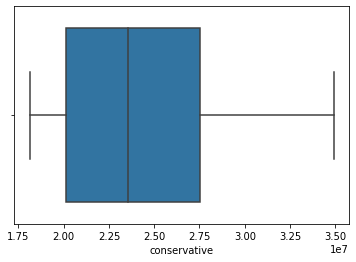

In [212]:
sns.boxplot(df_rankings['conservative']);

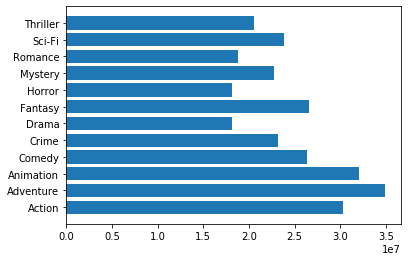

In [211]:
plt.barh(df.index, df_rankings['conservative'])
plt.show()

In [217]:
df_rankings.loc[(df_rankings['conservative'] == df_rankings['conservative'].min())
                | (df_rankings['conservative'] == df_rankings['conservative'].max())]

,conservative,compromised,aggressive
genres,,,
Adventure,3.492096e+07,3.382803e+07,10.033
Drama,1.811496e+07,1.808526e+07,9.072


In [224]:
def min_and_max_values(data, column):
    return data.loc[(data[column] == data[column].min()) | (data[column] == data[column].max())]

In [221]:
min_and_max_values(df_rankings, 'conservative')

,conservative,compromised,aggressive
genres,,,
Adventure,3.492096e+07,3.382803e+07,10.033
Drama,1.811496e+07,1.808526e+07,9.072


In [222]:
min_and_max_values(df_rankings, 'compromised')

,conservative,compromised,aggressive
genres,,,
Adventure,3.492096e+07,3.382803e+07,10.033
Drama,1.811496e+07,1.808526e+07,9.072


In [223]:
min_and_max_values(df_rankings, 'aggressive')

,conservative,compromised,aggressive
genres,,,
Crime,2.322362e+07,2.253045e+07,10.531
Horror,1.812190e+07,1.864512e+07,8.056
